# Deep learning with Keras
https://www.pyimagesearch.com/2018/09/10/keras-tutorial-how-to-get-started-with-keras-deep-learning-and-python/

In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential, load_model
from keras.layers.core import Dense
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import pickle
import cv2
import os

Using TensorFlow backend.


## Settings

In [2]:
dataset = "animals"  # Path to input dataset of images

## Initialization

In [3]:
data = []
labels = []

# Grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images(dataset)))
random.seed(42)
random.shuffle(imagePaths)

# Loop over the input images
for imagePath in imagePaths:
    # Load the image, resize the image to be 32x32 pixels (ignoring aspect ratio),
    # flatten the image into 32x32x3=3072 pixel image into a list, and store the image in the data list
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (32, 32)).flatten()
    data.append(image)

    # Extract the class label from the image path and update the labels list
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)
    
# Scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

## Partition the data
Partition the data into training and testing splits using 75% of the data for training and the remaining 25% for testing

In [4]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)

Convert the labels from integers to vectors (for 2-class, binary classification you should use Keras' to_categorical function instead as the scikit-learn's LabelBinarizer will not return a vector)

In [5]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

## Define the architecture
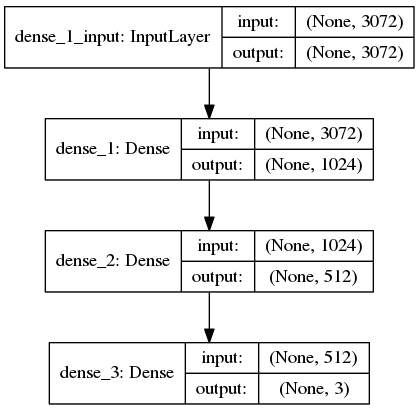

In [6]:
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="sigmoid"))
model.add(Dense(512, activation="sigmoid"))
model.add(Dense(len(lb.classes_), activation="softmax"))

In [7]:
# Initialize our initial learning rate and # of epochs to train for
INIT_LR = 0.01
EPOCHS = 75

# Compile the model using SGD (Stochastic gradient descent) as our optimizer and categorical
# cross-entropy loss (you'll want to use binary_crossentropy for 2-class classification)
opt = SGD(lr=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

## Train the network

In [8]:
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=EPOCHS, batch_size=32)

Train on 2250 samples, validate on 750 samples
Epoch 1/75
2250/2250 [==============================] - 1s 302us/step - loss: 1.1030 - accuracy: 0.3676 - val_loss: 1.1260 - val_accuracy: 0.3147
Epoch 2/75
2250/2250 [==============================] - 1s 308us/step - loss: 1.0784 - accuracy: 0.3951 - val_loss: 1.0788 - val_accuracy: 0.3293
Epoch 3/75
2250/2250 [==============================] - 1s 305us/step - loss: 1.0634 - accuracy: 0.4271 - val_loss: 1.0394 - val_accuracy: 0.4133
Epoch 4/75
2250/2250 [==============================] - 1s 279us/step - loss: 1.0379 - accuracy: 0.4667 - val_loss: 1.0279 - val_accuracy: 0.4640
Epoch 5/75
2250/2250 [==============================] - 1s 270us/step - loss: 1.0276 - accuracy: 0.4849 - val_loss: 1.0158 - val_accuracy: 0.5333
Epoch 6/75
2250/2250 [==============================] - 1s 293us/step - loss: 1.0099 - accuracy: 0.4880 - val_loss: 1.1014 - val_accuracy: 0.3360
Epoch 7/75
2250/2250 [==============================] - 1s 316us/step - loss:

2250/2250 [==============================] - 1s 279us/step - loss: 0.7958 - accuracy: 0.5987 - val_loss: 0.8223 - val_accuracy: 0.6160
Epoch 57/75
2250/2250 [==============================] - 1s 281us/step - loss: 0.7956 - accuracy: 0.5987 - val_loss: 0.8598 - val_accuracy: 0.5427
Epoch 58/75
2250/2250 [==============================] - 1s 297us/step - loss: 0.7962 - accuracy: 0.5938 - val_loss: 0.8435 - val_accuracy: 0.5880
Epoch 59/75
2250/2250 [==============================] - 1s 287us/step - loss: 0.7977 - accuracy: 0.5796 - val_loss: 0.9342 - val_accuracy: 0.5227
Epoch 60/75
2250/2250 [==============================] - 1s 278us/step - loss: 0.7859 - accuracy: 0.6071 - val_loss: 0.8379 - val_accuracy: 0.5960
Epoch 61/75
2250/2250 [==============================] - 1s 306us/step - loss: 0.7901 - accuracy: 0.5991 - val_loss: 0.8988 - val_accuracy: 0.5293
Epoch 62/75
2250/2250 [==============================] - 1s 296us/step - loss: 0.7899 - accuracy: 0.5951 - val_loss: 0.8292 - val_

## Evaluate the model

              precision    recall  f1-score   support

        cats       0.89      0.07      0.13       236
        dogs       0.44      0.73      0.55       236
       panda       0.69      0.84      0.76       278

    accuracy                           0.56       750
   macro avg       0.68      0.55      0.48       750
weighted avg       0.68      0.56      0.50       750



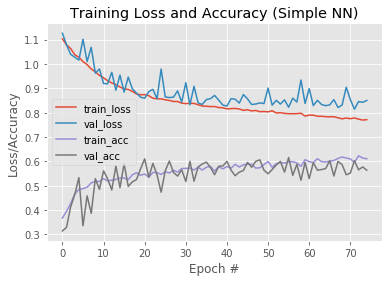

In [9]:
# Evaluate the network
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))

# Plot the training loss and accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## Save it to disk

In [10]:
model_path = "output/simple_nn.model"
label_bin = "output/simple_nn_lb.pickle"
model.save(model_path)
f = open(label_bin, "wb")
f.write(pickle.dumps(lb))
f.close()

## Make a prediction

In [11]:
image_path = "images/cat.jpg"

# Load the input image and resize it to the target spatial dimensions
image = cv2.imread(image_path)
output = image.copy()
image = cv2.resize(image, (32, 32))

# Scale the pixel values to [0, 1]
image = image.astype("float") / 255.0

image = image.flatten()
image = image.reshape((1, image.shape[0]))

In [12]:
# Load the model and label binarizer
model = load_model(model_path)
lb = pickle.loads(open(label_bin, "rb").read())

# Make a prediction on the image
preds = model.predict(image)
print("Prediction:", preds)

# Find the class label index with the largest corresponding probability
i = preds.argmax(axis=1)[0]
label = lb.classes_[i]

Prediction: [[0.24959733 0.48317033 0.26723236]]


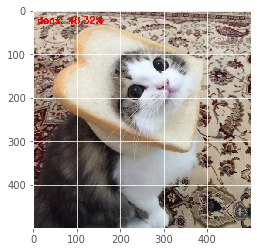

In [13]:
# Draw the class label + probability on the output image
text = "{}: {:.2f}%".format(label, preds[0][i] * 100)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

# Show the output image
output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
plt.imshow(output)